# Predict the damage to a building

Determining the degree of damage that is done to buildings post an earthquake can help identify safe and unsafe buildings, thus avoiding death and injuries resulting from aftershocks.  Leveraging the power of machine learning is one viable option that can potentially prevent massive loss of lives while simultaneously making rescue efforts easy and efficient.

In this challenge we provide you with the before and after details of nearly one million buildings after an earthquake. The damage to a building is categorized in five grades. Each grade depicts the extent of damage done to a building post an earthquake.

Given building details, your task is to build a model that can predict the extent of damage that has been done to a building after an earthquake.

In [0]:
#import lib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
#set the plotting style
plt.style.use("seaborn")

# Import Data

In [11]:
!unzip data

Archive:  data.zip
replace data/Building_Ownership_Use.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/Building_Ownership_Use.csv  
replace data/Building_Structure.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/Building_Structure.csv  
replace data/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/sample_submission.csv  
replace data/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/test.csv           
replace data/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: data/train.csv          


In [0]:
PATH = 'data'

PATH_TO_train_data = PATH + '/' + 'train.csv'
PATH_TO_test_data = PATH + '/' + 'test.csv'
PATH_TO_building_structure = PATH + '/' + 'Building_Structure.csv'
PATH_TO_building_ownership = PATH + '/' + 'Building_Ownership_Use.csv'

In [0]:
#load the data

train_data = pd.read_csv(PATH_TO_train_data)
ownership_data = pd.read_csv(PATH_TO_building_ownership)
structure_data = pd.read_csv(PATH_TO_building_structure)
test_data = pd.read_csv(PATH_TO_test_data)

In [14]:
#peak into the data

train_data.head()

,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,0,0.0,2489
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,0,1.0,4423
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,0,0.0,3650
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,0,0.0,3016
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,0,0.0,3627


In [15]:
ownership_data.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,a3380c4f75,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,a338a4e653,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [16]:
structure_data.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,a3380c4f75,7,701,70102,1,1,28,454,9,9,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Attached-1 side,Rectangular,0,1,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
1,a3380c4fd9,7,701,70102,1,1,32,324,9,9,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Attached-1 side,Rectangular,0,1,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
2,a3380c503e,7,701,70102,2,2,34,456,18,18,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
3,a338a4e5f2,7,701,70103,2,2,20,452,18,18,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
4,a338a4e653,7,701,70103,1,0,25,542,9,0,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,Attached-1 side,Rectangular,0,1,0,0,0,0,1,1,0,0,1,Damaged-Rubble unclear


In [17]:
test_data.head()

,area_assesed,building_id,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,a3380c4f75,7,0.0,0,0,0,0,0,0,0,1.0,701
1,Both,a338a4e653,7,0.0,0,0,0,0,0,0,0,1.0,701
2,Building removed,a338a4e6b7,7,0.0,0,0,0,0,0,0,0,1.0,701
3,Both,a33a6eaa3a,7,0.0,0,0,0,0,0,0,0,1.0,701
4,Building removed,a33b073ff6,7,0.0,0,0,0,0,0,0,0,1.0,701


In [18]:
#shape of the data

train_data.shape

(631761, 14)

In [19]:
ownership_data.shape

(1052948, 17)

In [20]:
structure_data.shape

(1052948, 29)

In [21]:
test_data.shape

(421175, 13)

In [0]:
#Converting the object target to int type
target = {'Grade 1': 1, 'Grade 2': 2, 'Grade 3': 3, 'Grade 4': 4, 'Grade 5': 5}
train_data['damage_grade'].replace(target, inplace=True)

# Merging Data
- building_id is common variable among the three data sets. So we will create a master data table by merging these datasets

In [0]:
#merging the train data with structure data

train_data = pd.merge(train_data, structure_data, on = "building_id")

In [24]:
train_data.head()

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id_x,district_id_y,vdcmun_id_y,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,Both,24385bfd2a2,4,24,0.0,0,0,0,0,0,0,0,0.0,2489,24,2489,248903,3,3,21,385,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,1,0,0,0,0,0,0,0,0,0,0,Damaged-Not used
1,Both,405d1bbebbf,2,44,0.0,0,0,0,0,0,0,0,1.0,4423,44,4423,442304,3,3,33,602,24,24,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,1,0,0,0,0,0,0,Damaged-Repaired and used
2,Both,351d9bc71f6,1,36,0.0,0,0,0,0,0,0,0,0.0,3650,36,3650,365008,3,3,2,700,21,21,Steep slope,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Attached-1 side,Rectangular,0,0,0,0,0,0,0,0,0,1,0,Not damaged
3,Building removed,2be3a971166,5,30,0.0,0,0,0,0,0,0,0,0.0,3016,30,3016,301605,3,0,3,315,20,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear
4,Both,34c7d073ea6,3,36,0.0,0,0,0,0,0,0,0,0.0,3627,36,3627,362705,2,2,22,285,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk


In [0]:
#merge the ownership data 

train_merged = pd.merge(train_data, ownership_data, on = "building_id")

In [26]:
train_merged.head()

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id_x,district_id_y,vdcmun_id_y,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,district_id,vdcmun_id,ward_id_y,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,Both,24385bfd2a2,4,24,0.0,0,0,0,0,0,0,0,0.0,2489,24,2489,248903,3,3,21,385,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,1,0,0,0,0,0,0,0,0,0,0,Damaged-Not used,24,2489,248903,Private,2.0,0.0,0,0,0,0,0,0,0,0,0,0
1,Both,405d1bbebbf,2,44,0.0,0,0,0,0,0,0,0,1.0,4423,44,4423,442304,3,3,33,602,24,24,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,1,0,0,0,0,0,0,Damaged-Repaired and used,44,4423,442304,Private,1.0,1.0,0,1,0,0,0,0,0,0,0,0
2,Both,351d9bc71f6,1,36,0.0,0,0,0,0,0,0,0,0.0,3650,36,3650,365008,3,3,2,700,21,21,Steep slope,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Attached-1 side,Rectangular,0,0,0,0,0,0,0,0,0,1,0,Not damaged,36,3650,365008,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,Building removed,2be3a971166,5,30,0.0,0,0,0,0,0,0,0,0.0,3016,30,3016,301605,3,0,3,315,20,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,30,3016,301605,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,Both,34c7d073ea6,3,36,0.0,0,0,0,0,0,0,0,0.0,3627,36,3627,362705,2,2,22,285,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,36,3627,362705,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


# Descriptive Analysis

- Final Base table analysis

In [27]:
train_merged.shape

(631761, 58)

In [28]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 58 columns):
area_assesed                              631761 non-null object
building_id                               631761 non-null object
damage_grade                              631761 non-null int64
district_id_x                             631761 non-null int64
has_geotechnical_risk                     631761 non-null float64
has_geotechnical_risk_fault_crack         631761 non-null int64
has_geotechnical_risk_flood               631761 non-null int64
has_geotechnical_risk_land_settlement     631761 non-null int64
has_geotechnical_risk_landslide           631761 non-null int64
has_geotechnical_risk_liquefaction        631761 non-null int64
has_geotechnical_risk_other               631761 non-null int64
has_geotechnical_risk_rock_fall           631761 non-null int64
has_repair_started                        598344 non-null float64
vdcmun_id_x                               631761 no

In [29]:
#basic descriptive stats

train_merged.describe()

,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id_x,district_id_y,vdcmun_id_y,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,district_id,vdcmun_id,ward_id_y,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,598344.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631760.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000
mean,3.579602,26.831720,0.123920,0.042708,0.009263,0.034602,0.069629,0.002319,0.001061,0.034853,0.316076,2712.186552,26.831720,2712.186552,271224.334601,2.130985,1.335641,27.805518,417.907500,16.308984,10.383541,0.089029,0.761429,0.034189,0.018613,0.068186,0.075619,0.253346,0.083660,0.042874,0.016079,0.014969,26.831720,2712.186552,271224.334601,0.984075,0.112334,0.063974,0.034182,0.008391,0.000972,0.000397,0.001103,0.000203,0.000150,0.000089,0.005041
std,1.327710,7.771394,0.329491,0.202197,0.095798,0.182769,0.254521,0.048099,0.032548,0.183408,0.464943,777.505768,7.771394,777.505768,77750.671303,0.727712,1.097094,72.942364,231.192299,5.793634,8.644051,0.284786,0.426210,0.181713,0.135154,0.252064,0.264387,0.434928,0.276877,0.202573,0.125779,0.121430,7.771394,777.505768,77750.671303,0.419209,0.315777,0.244706,0.181697,0.091216,0.031160,0.019928,0.033197,0.014233,0.012262,0.009415,0.070824
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,701.000000,7.000000,701.000000,70102.000000,1.000000,0.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,701.000000,70102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2242.000000,22.000000,2242.000000,224201.000000,2.000000,0.000000,10.000000,284.000000,13.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,2242.000000,224201.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2703.000000,27.000000,2703.000000,270301.000000,2.000000,2.000000,18.000000,364.000000,16.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,2703.000000,270301.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [30]:
train_merged.head()

,area_assesed,building_id,damage_grade,district_id_x,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id_x,district_id_y,vdcmun_id_y,ward_id_x,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,district_id,vdcmun_id,ward_id_y,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,Both,24385bfd2a2,4,24,0.0,0,0,0,0,0,0,0,0.0,2489,24,2489,248903,3,3,21,385,20,20,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,1,0,0,0,0,0,0,0,0,0,0,Damaged-Not used,24,2489,248903,Private,2.0,0.0,0,0,0,0,0,0,0,0,0,0
1,Both,405d1bbebbf,2,44,0.0,0,0,0,0,0,0,0,1.0,4423,44,4423,442304,3,3,33,602,24,24,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,TImber/Bamboo-Mud,Attached-1 side,Rectangular,0,1,0,0,1,0,0,0,0,0,0,Damaged-Repaired and used,44,4423,442304,Private,1.0,1.0,0,1,0,0,0,0,0,0,0,0
2,Both,351d9bc71f6,1,36,0.0,0,0,0,0,0,0,0,0.0,3650,36,3650,365008,3,3,2,700,21,21,Steep slope,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Attached-1 side,Rectangular,0,0,0,0,0,0,0,0,0,1,0,Not damaged,36,3650,365008,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,Building removed,2be3a971166,5,30,0.0,0,0,0,0,0,0,0,0.0,3016,30,3016,301605,3,0,3,315,20,0,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Rubble clear,30,3016,301605,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,Both,34c7d073ea6,3,36,0.0,0,0,0,0,0,0,0,0.0,3627,36,3627,362705,2,2,22,285,18,18,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Used in risk,36,3627,362705,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


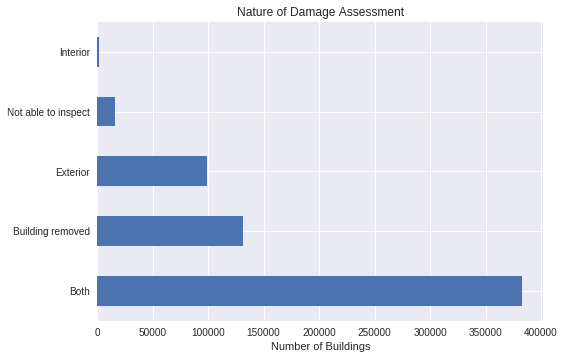

In [31]:
#analyse the area_assesed

train_merged.area_assesed.value_counts().plot(kind = "barh")
plt.title("Nature of Damage Assessment")
plt.xlabel("Number of Buildings")
plt.show()

In [0]:
#dropping the duplicate columns

train_merged.drop(["district_id_x", "district_id_y", "vdcmun_id_x", "vdcmun_id_y", "ward_id_x", "building_id"], axis = 1, inplace= True)

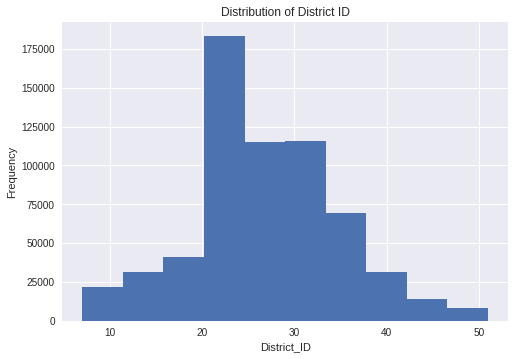

In [33]:
#distribution of district_id

train_merged.district_id.plot(kind = "hist")
plt.xlabel("District_ID")
plt.title("Distribution of District ID")
plt.show()

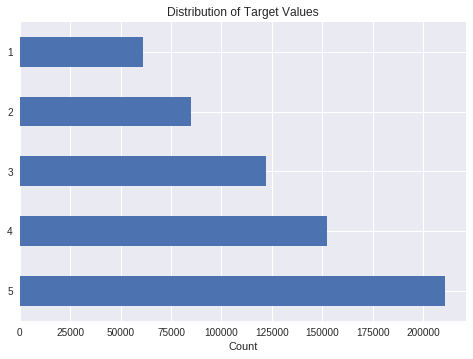

In [34]:
#lets check the distribution of target variable

train_merged.damage_grade.value_counts().plot(kind = "barh")
plt.title("Distribution of Target Values")
plt.xlabel("Count")
plt.show()

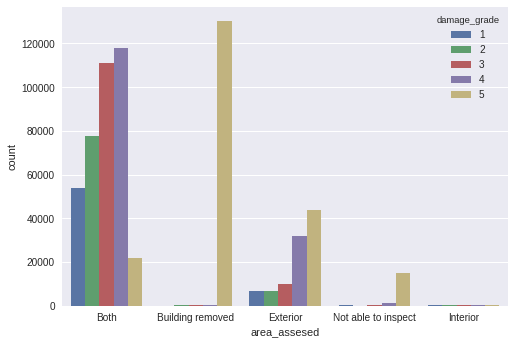

In [35]:
#distribution of area_assesed by target variable

sns.countplot(x = "area_assesed", data = train_merged, hue = "damage_grade")
plt.show()

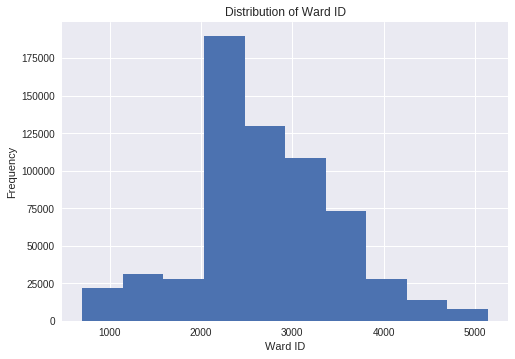

In [36]:
#check the distribution of Municipality where the building is located

train_merged.vdcmun_id.plot(kind = "hist")
plt.xlabel("Ward ID")
plt.title("Distribution of Ward ID")
plt.show()

# Missing Values Check

In [37]:
# check the missing values

columns_has_missing = train_merged.isna().sum()
columns_has_missing = columns_has_missing[columns_has_missing.nonzero()[0]]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
columns_has_missing

has_repair_started    33417
count_families            1
dtype: int64

In [0]:
#filling the missing values

train_merged.fillna(0, inplace=True)

In [40]:
train_merged.isna().sum().sum()

0

# Handling Categorical Variables

In [41]:
#remove the duplicated values

train_merged.duplicated().sum()

6615

In [0]:
duplicates = train_merged.duplicated(keep=False)

In [0]:
#delete the duplicate data

train_merged = train_merged[~duplicates]

In [44]:
train_merged.duplicated(keep = False).sum()

0

In [0]:
#segregating the variables based on datatypes

numeric_variable_names  = [key for key in dict(train_merged.dtypes) if dict(train_merged.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

categorical_variable_names = [key for key in dict(train_merged.dtypes) if dict(train_merged.dtypes)[key] in ["object"]]

In [46]:
print(numeric_variable_names)

['damage_grade', 'has_geotechnical_risk', 'has_geotechnical_risk_fault_crack', 'has_geotechnical_risk_flood', 'has_geotechnical_risk_land_settlement', 'has_geotechnical_risk_landslide', 'has_geotechnical_risk_liquefaction', 'has_geotechnical_risk_other', 'has_geotechnical_risk_rock_fall', 'has_repair_started', 'count_floors_pre_eq', 'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'district_id', 'vdcmun_id', 'ward_id_y', 'count_families', 'has_secondary_use', 'has_secondary_use_agriculture', 'has_secondary_use_hotel', 'has_secondary_use_rental', 'has_s

In [47]:
print(categorical_variable_names)

['area_assesed', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'condition_post_eq', 'legal_ownership_status']


In [48]:
#store the numerical variables data in seperate dataset

train_merged_num = train_merged[numeric_variable_names]
train_merged_num.head()

,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,district_id,vdcmun_id,ward_id_y,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,4,0.0,0,0,0,0,0,0,0,0.0,3,3,21,385,20,20,1,0,0,0,0,0,0,0,0,0,0,24,2489,248903,2.0,0.0,0,0,0,0,0,0,0,0,0,0
1,2,0.0,0,0,0,0,0,0,0,1.0,3,3,33,602,24,24,0,1,0,0,1,0,0,0,0,0,0,44,4423,442304,1.0,1.0,0,1,0,0,0,0,0,0,0,0
2,1,0.0,0,0,0,0,0,0,0,0.0,3,3,2,700,21,21,0,0,0,0,0,0,0,0,0,1,0,36,3650,365008,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,5,0.0,0,0,0,0,0,0,0,0.0,3,0,3,315,20,0,0,1,0,0,0,0,0,0,0,0,0,30,3016,301605,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,3,0.0,0,0,0,0,0,0,0,0.0,2,2,22,285,18,18,0,1,0,0,0,0,0,0,0,0,0,36,3627,362705,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [49]:
#store the categorical variables data in seperate dataset

train_merged_cat = train_merged[categorical_variable_names]
train_merged_cat.head()

,area_assesed,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,legal_ownership_status
0,Both,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Not used,Private
1,Both,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Brick/Stone,TImber/Bamboo-Mud,Attached-1 side,Rectangular,Damaged-Repaired and used,Private
2,Both,Steep slope,RC,RCC/RB/RBC,RC,RCC/RB/RBC,Attached-1 side,Rectangular,Not damaged,Private
3,Building removed,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,Not attached,Rectangular,Damaged-Rubble clear,Private
4,Both,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Heavy roof,Mud,TImber/Bamboo-Mud,Not attached,Rectangular,Damaged-Used in risk,Private


In [0]:
#converting into dummy variables

train_merged_cat = pd.get_dummies(train_merged_cat, drop_first=True)

In [0]:
#Merging the both numerical and categorical data

train_cleaned = pd.concat([train_merged_num, train_merged_cat],axis=1)

In [52]:
train_cleaned.head()

,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,district_id,vdcmun_id,ward_id_y,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,...,area_assesed_Exterior,area_assesed_Interior,area_assesed_Not able to inspect,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,roof_type_Bamboo/Timber-Light roof,roof_type_RCC/RB/RBC,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,position_Attached-2 side,position_Attached-3 side,position_Not attached,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,legal_ownership_status_Other,legal_ownership_status_Private,legal_ownership_status_Public
0,4,0.0,0,0,0,0,0,0,0,0.0,3,3,21,385,20,20,1,0,0,0,0,0,0,0,0,0,0,24,2489,248903,2.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,2,0.0,0,0,0,0,0,0,0,1.0,3,3,33,602,24,24,0,1,0,0,1,0,0,0,0,0,0,44,4423,442304,1.0,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,1,0.0,0,0,0,0,0,0,0,0.0,3,3,2,700,21,21,0,0,0,0,0,0,0,0,0,1,0,36,3650,365008,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,5,0.0,0,0,0,0,0,0,0,0.0,3,0,3,315,20,0,0,1,0,0,0,0,0,0,0,0,0,30,3016,301605,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,3,0.0,0,0,0,0,0,0,0,0.0,2,2,22,285,18,18,0,1,0,0,0,0,0,0,0,0,0,36,3627,362705,1.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [53]:
train_cleaned.shape

(619836, 83)

## Separating the Target and the Predictors

In [54]:
#seperating the target and predictors

X = train_cleaned.drop(columns= ["damage_grade"])
X.head()

,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,district_id,vdcmun_id,ward_id_y,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,...,area_assesed_Exterior,area_assesed_Interior,area_assesed_Not able to inspect,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,roof_type_Bamboo/Timber-Light roof,roof_type_RCC/RB/RBC,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,position_Attached-2 side,position_Attached-3 side,position_Not attached,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,legal_ownership_status_Other,legal_ownership_status_Private,legal_ownership_status_Public
0,0.0,0,0,0,0,0,0,0,0.0,3,3,21,385,20,20,1,0,0,0,0,0,0,0,0,0,0,24,2489,248903,2.0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0.0,0,0,0,0,0,0,0,1.0,3,3,33,602,24,24,0,1,0,0,1,0,0,0,0,0,0,44,4423,442304,1.0,1.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
2,0.0,0,0,0,0,0,0,0,0.0,3,3,2,700,21,21,0,0,0,0,0,0,0,0,0,1,0,36,3650,365008,1.0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
3,0.0,0,0,0,0,0,0,0,0.0,3,0,3,315,20,0,0,1,0,0,0,0,0,0,0,0,0,30,3016,301605,1.0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0.0,0,0,0,0,0,0,0,0.0,2,2,22,285,18,18,0,1,0,0,0,0,0,0,0,0,0,36,3627,362705,1.0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0


In [55]:
y = pd.DataFrame(train_cleaned.damage_grade)
y.head()

,damage_grade
0,4
1,2
2,1
3,5
4,3


# SMOTE data

In [56]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

#function for crossvalidate score
from sklearn.model_selection import cross_validate

#to find the best 
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#for fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#to create a confusion matrix
from sklearn.metrics import confusion_matrix

#import whole class of metrics
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
#using SMOTE technique 
smote = SMOTE(random_state=0)
os_data_X, os_data_y = smote.fit_sample(X, y.damage_grade)

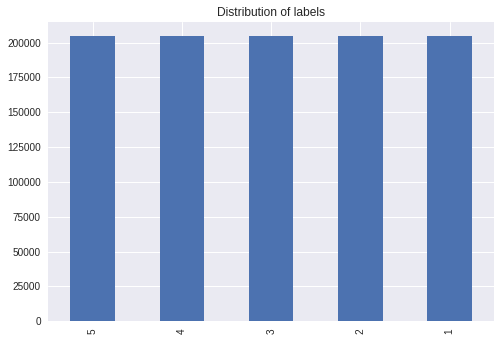

In [58]:
pd.DataFrame(data = os_data_y, columns = ["damage_grade"]).damage_grade.value_counts().plot('bar')
plt.title("Distribution of labels")
plt.show()

# Split Data

In [0]:
#split the data using stratified sampling

X_train_str, X_test_str, y_train_str,y_test_str = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 100)

In [0]:
#split the SMOTE data

X_train_so, X_test_so, y_train_so,y_test_so = train_test_split(os_data_X,os_data_y,test_size = 0.3,random_state = 101)

In [61]:
#check the size of the data
X_train_so.shape

(715550, 82)

In [62]:
X_test_so.shape

(306665, 82)

# Preprocessing on Test Data

In [0]:
#merging all the datasets

test_data = pd.merge(test_data, structure_data, on = "building_id")
test_data = pd.merge(test_data, ownership_data, on = "building_id")

In [0]:
#dropping the duplicate columns

test_data.drop(["district_id_x", "district_id_y", "vdcmun_id_x", "vdcmun_id_y", "ward_id_x", "building_id"], axis = 1, inplace= True)

In [65]:
#get the dummies for categorical data

test_data = pd.get_dummies(test_data, drop_first=True)
test_data.head()

,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,district_id,vdcmun_id,ward_id_y,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,...,area_assesed_Exterior,area_assesed_Interior,area_assesed_Not able to inspect,land_surface_condition_Moderate slope,land_surface_condition_Steep slope,foundation_type_Cement-Stone/Brick,foundation_type_Mud mortar-Stone/Brick,foundation_type_Other,foundation_type_RC,roof_type_Bamboo/Timber-Light roof,roof_type_RCC/RB/RBC,ground_floor_type_Mud,ground_floor_type_Other,ground_floor_type_RC,ground_floor_type_Timber,other_floor_type_RCC/RB/RBC,other_floor_type_TImber/Bamboo-Mud,other_floor_type_Timber-Planck,position_Attached-2 side,position_Attached-3 side,position_Not attached,plan_configuration_E-shape,plan_configuration_H-shape,plan_configuration_L-shape,plan_configuration_Multi-projected,plan_configuration_Others,plan_configuration_Rectangular,plan_configuration_Square,plan_configuration_T-shape,plan_configuration_U-shape,condition_post_eq_Damaged-Not used,condition_post_eq_Damaged-Repaired and used,condition_post_eq_Damaged-Rubble Clear-New building built,condition_post_eq_Damaged-Rubble clear,condition_post_eq_Damaged-Rubble unclear,condition_post_eq_Damaged-Used in risk,condition_post_eq_Not damaged,legal_ownership_status_Other,legal_ownership_status_Private,legal_ownership_status_Public
0,0.0,0,0,0,0,0,0,0,1.0,1,1,28,454,9,9,0,1,0,0,0,0,1,1,0,0,1,7,701,70102,1.0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0.0,0,0,0,0,0,0,0,1.0,1,0,25,542,9,0,0,1,0,0,0,0,1,1,0,0,1,7,701,70103,1.0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0.0,0,0,0,0,0,0,0,1.0,2,0,35,589,18,0,0,1,0,0,0,0,1,1,0,0,0,7,701,70103,1.0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0.0,0,0,0,0,0,0,0,1.0,2,2,22,468,18,18,0,1,1,0,0,0,1,1,0,0,1,7,701,70106,1.0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0.0,0,0,0,0,0,0,0,1.0,1,0,24,426,9,0,0,1,1,0,0,0,1,1,0,0,1,7,701,70107,1.0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0


In [0]:
#fill the missing values

test_data.fillna(0, inplace=True)

# Modeling

- Train on the training data

In [0]:
#make a pipeline for decision tree model 

pipelines = {
    "clf": make_pipeline(DecisionTreeClassifier(max_depth=5,random_state=100))
}

In [68]:
scores = cross_validate(pipelines['clf'], X_train_so, y_train_so,return_train_score=True)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [69]:
scores

{'fit_time': array([11.06229472, 11.04790044, 11.23700595]),
 'score_time': array([0.1060884 , 0.10524011, 0.10471654]),
 'test_score': array([0.66657862, 0.66792304, 0.66622644]),
 'train_score': array([0.66708732, 0.66640253, 0.6672676 ])}

In [70]:
scores['test_score'].mean()

0.6669093689677781

Average accuracy of pipeline with Decision Tree Classifier is 66.37%

#### Cross-Validation and Hyper Parameters Tuning
Cross Validation is the process of finding the best combination of parameters for the model by traning and evaluating the model for each combination of the parameters
- Declare a hyper-parameters to fine tune the Decision Tree Classifier

**Decision Tree is a greedy alogritum it searches the entire space of possible decision trees. so we need to find a optimum parameter(s) or criteria for stopping the decision tree at some point. We use the hyperparameters to prune the decision tree**

In [0]:
decisiontree_hyperparameters = {
    "decisiontreeclassifier__max_depth": np.arange(3,12),
    "decisiontreeclassifier__max_features": np.arange(3,10),
    "decisiontreeclassifier__min_samples_split": [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}

In [72]:
pipelines['clf']

Pipeline(memory=None,
         steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=5, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=100,
                                        splitter='best'))],
         verbose=False)

## Decision Tree classifier with gini index

#### Fit and tune models with cross-validation

Now that we have our <code style="color:steelblue">pipelines</code> and <code style="color:steelblue">hyperparameters</code> dictionaries declared, we're ready to tune our models with cross-validation.
- We are doing 5 fold cross validation

In [0]:
def feature_importance(model, X_train):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X_train.columns
    important_features = []
    important_features_scores = []
    for index in indices:
        important_features.append(features[index])
        important_features_scores.append(importances[index])
    feature_importance_df = pd.Series(data=important_features_scores, index=important_features)
    return feature_importance_df

In [0]:
#Create a cross validation object from decision tree classifier and it's hyperparameters

clf_model = GridSearchCV(pipelines['clf'], decisiontree_hyperparameters, cv=5, n_jobs= -1, verbose=1)

In [75]:
#fit the model with train data
clf_model.fit(X_train_so, y_train_so)

Fitting 5 folds for each of 1764 candidates, totalling 8820 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   49.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 46.0min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 62.7min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 83.7min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 109.2min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 137.2min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 169.0min
[Parallel(n_jobs=-1)]: Done 8446 tasks      | elapsed: 206.3min
[Parallel(n_jobs=-1)]: Done 8820 out of 8820 | elapsed: 219.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(class_weight=None,
                                                               criterion='gini',
                                                               max_depth=5,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                                               min_weight_fraction_leaf

In [76]:
#Display the best parameters for Decision Tree Model
clf_model.best_params_

{'decisiontreeclassifier__max_depth': 11,
 'decisiontreeclassifier__max_features': 9,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 11}

In [77]:
#Display the best score for the fitted model
clf_model.best_score_

0.6918649989518553

In [78]:
#In Pipeline we can use the string names to get the decisiontreeclassifer

clf_model.best_estimator_.named_steps['decisiontreeclassifier']

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
                       max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

### Model Performance Evaluation
- On Test Data

In [87]:
tree_test_pred = pd.DataFrame({'actual': y_test_so, 'predicted': clf_model.predict(X_test_so)})
tree_test_pred.head()

,actual,predicted
0,3,4
1,3,2
2,4,4
3,2,2
4,5,5


In [92]:
tree_test_pred.predicted.value_counts()

2    80476
4    72954
5    57875
1    54589
3    40771
Name: predicted, dtype: int64

### Confusion Matrix

The confusion matrix is a way of tabulating the number of misclassifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes.

In [88]:
#confusion matrix
metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted)

array([[53339,  7781,   186,   160,     0],
       [ 1052, 40660, 12037,  7311,     0],
       [  168, 23565, 16913, 20733,     1],
       [   26,  8223, 11352, 41934,    15],
       [    4,   247,   283,  2816, 57859]])

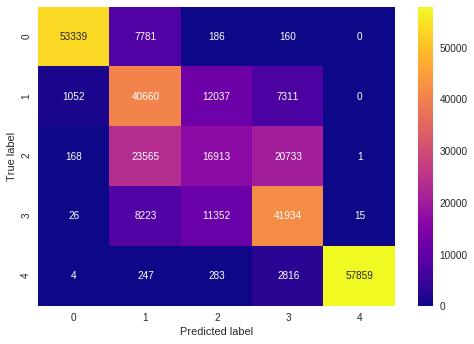

In [95]:
#confusion matrix visualization using seaborn heatmap

sns.heatmap(metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted, labels=[1, 2, 3, 4, 5]),cmap="plasma",annot=True,fmt="g")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [98]:
#classification report

print(metrics.classification_report(tree_test_pred.actual,tree_test_pred.predicted))

              precision    recall  f1-score   support

           1       0.98      0.87      0.92     61466
           2       0.51      0.67      0.57     61060
           3       0.41      0.28      0.33     61380
           4       0.57      0.68      0.62     61550
           5       1.00      0.95      0.97     61209

    accuracy                           0.69    306665
   macro avg       0.69      0.69      0.68    306665
weighted avg       0.69      0.69      0.68    306665



In [102]:
#making predictions on test data

final_pred_test = pd.DataFrame({'Predicted': clf_model.predict(test_data)})
final_pred_test.head()

,Predicted
0,2
1,5
2,5
3,2
4,5


# Save the Model

In [0]:
import pickle

Let's save the winning <code style="color:steelblue">Pipeline</code> object into a pickle file.

In [0]:
with open('final_model.pkl', 'wb') as f:
    pickle.dump(clf_model.best_estimator_.named_steps['decisiontreeclassifier'], f)